In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
# SAT = Critical reading + mathematics + writing
# GPA = Grade point average(at graduation from university)
# We will create a linear regression which predicts GPA based on the SAT score obtained
# Each time you create a regression, it should be meaningful

data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
# dependent variable is GPD

y = data['GPA']


In [6]:
# independent variable is SAT

x1 = data['SAT']

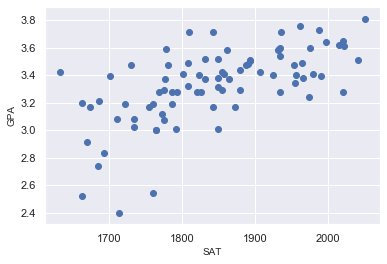

In [7]:
# the higher the SAT of student, the higher their GPA

plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('GPA', fontsize = 10)
plt.show()

In [8]:
x = sm.add_constant(x1)

/Users/How.Short/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
# results will contain the output of the ordinary least square regresiion
# fit() will apply a specific estimation technique to obtain the fit of the model
# the estimation technique in this case is OLS

results = sm.OLS(y,x).fit()

In [10]:
# it will display the regression results and organize them
# show the statistics information

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           7.20e-11
Time:                        14:12:08   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

___
The regression equation is <code>ŷ = b0 + b1x1.</code>

See the coefficients table:

* The coefficient of the intercept or the constant, both term are used interchangeably.

* The const coef value is 0.275, that means the b0 is 0.275.

* The SAT coef value is 0.0017, that means the b1 is 0.0017.

* The const and SAT coef are the only two numbers we need to define the regression equation.

So the regression equation is <code>ŷ = 0.275 + 0.0017x1</code>, that means <code>GPA = 0.275 + 0.0017 * SAT.</code>

* The standard error show the accuracy of prediction for each variable, the lower standard error, the better the estimate.
___

The coefficients table also have t and p value:

* The t and p value are involved the hypothesis.

* The null hypothesis is <code>H0:β = 0</code>, that means <code>H0:b0 = 0,</code>, so it is not significantly different from 0.

* The SAT p value is a significant variable when predicting college GPA, so it is significantly different from 0.

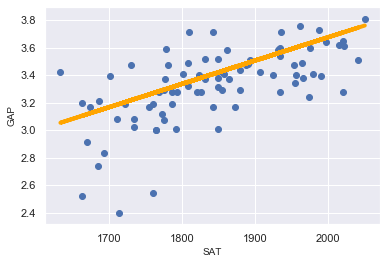

In [11]:
# show the regression line
# that's the best fitting line, or the line which it closet to all observations simultaneously
# yhat is the regression equation
# this is the correct regression plot

plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1, yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('GAP', fontsize = 10)
plt.show()

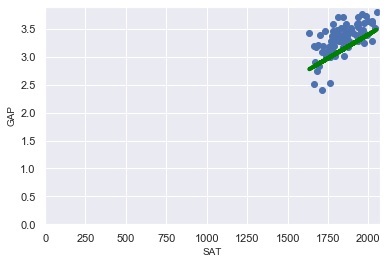

In [12]:
# this is accept the null hypothesis
# so if b0 = 0, the line crosses the y axis at the origin

plt.scatter(x1,y)
yhat = 0.0017*x1 + 0
fig = plt.plot(x1, yhat, lw = 4, c = 'green', label = 'regression line')
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('GAP', fontsize = 10)
plt.xlim(0)
plt.ylim(0)
plt.show()

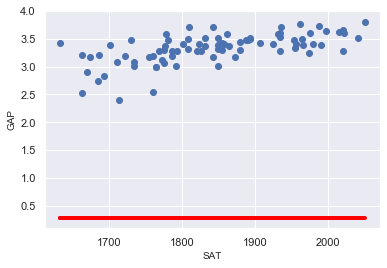

In [13]:
# this is the b1 = 0 
# if the b1 = 0, the yhat always be 0
# so the variable will not be the considered for the model
# that means the regression line is horizontal always going through the intercept value

plt.scatter(x1,y)
yhat = 0*x1 + 0.275
fig = plt.plot(x1, yhat, lw = 4, c = 'red', label = 'regression line')
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('GAP', fontsize = 10)
plt.show()